In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
!pip install konlpy > /dev/null

In [ ]:
from google.colab import files
uploaded = files.upload()
csvfile = list(uploaded.keys())[0]

Saving Galaxy.csv to Galaxy.csv


In [ ]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving Phone.png to Phone.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv(csvfile)
df.head()

,title,date,content
0,[스마트폰] 삼성 갤럭시Z 플립3 언박싱 후기,2021.08.16.,"진짜 역대급으로 나온 스마트폰, 삼성 갤럭시Z 플립3 언박싱 후기 함께 공개된 삼성..."
1,갤럭시 A03s의 출시소식과 상세 정보: 개발도상국용 초저가 스마트폰,7일 전,삼성이 인도시장 등 개발도상국용 초저가 스마트폰인 A0x 시리즈를 지난 2019년부...
2,에어팟 프로 안드로이드 스마트폰과 연결하는 방법,2021.08.21.,"그러면 이때 스마트폰 블루투스 메뉴로 가줍니다. 찾기를 눌러주면, 이렇게 검색이 되..."
3,갤럭시 굿락 루틴+ 스마트폰 배터리 충전 구간 알림,2021.08.08.,갤럭시 스마트폰을 사용하고 있다면 굿락 앱은 꼭 써볼 것을 추천드려요. 지속적인 업...
4,삼성 갤럭시노트10 가격 2021년에도 매력적인 스마트폰,2021.06.23.,"일상에서 스마트폰 사용량은 점점 늘어나고 있습니다. 카카오톡, 라인 같은 기본적인 ..."


In [ ]:
text = ''
for i in df.index:
    text += df.title[i] + '\n' + df.content[i] + '\n'

In [ ]:
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['스마트폰', '삼성', '갤럭시', '플립', '언박싱', '후기', '진짜', '역대', '스마트폰', '삼성']

In [ ]:
okt.nouns('오늘 갤럭시플립3과 갤럭시Z플립3와 갤럭시폴드3을 샀다')

['오늘', '갤럭시', '플립', '과', '갤럭시', '플립', '갤럭시', '폴드']

## Okt Issue

In [ ]:
!pip install customized_konlpy > /dev/null

In [ ]:
from ckonlpy.tag import Twitter
twt = Twitter()
twt.add_dictionary('갤럭시Z플립3', 'Noun')
twt.add_dictionary('갤럭시Z폴드3', 'Noun')
twt.nouns('오늘 갤럭시플립3과 갤럭시Z플립3와 갤럭시Z폴드3을 샀다')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['오늘', '갤럭시', '플립', '과', '갤럭시Z플립3', '갤럭시Z폴드3']

In [ ]:
trans_dict = {'갤럭시폴드3':'갤럭시Z폴드3', '갤럭시 폴드3':'갤럭시Z폴드3', 
              '갤럭시z폴드3':'갤럭시Z폴드3', '갤럭시Z 폴드3':'갤럭시Z폴드3',
              '갤럭시플립3':'갤럭시Z플립3', '갤럭시 플립3':'갤럭시Z플립3', 
              '갤럭시z플립3':'갤럭시Z플립3', '갤럭시Z 플립3':'갤럭시Z플립3'}
change_list = list(trans_dict.keys())

In [ ]:
sentence = '오늘 갤럭시 플립3과 갤럭시z플립3와 갤럭시z폴드3을 샀다'
def change_word(sentence):
    for cword in change_list:
        sentence = sentence.replace(cword, trans_dict[cword])
    return sentence
change_word(sentence)

'오늘 갤럭시Z플립3과 갤럭시Z플립3와 갤럭시Z폴드3을 샀다'

In [ ]:
new_text = change_word(text)

In [ ]:
new_tokens = twt.nouns(new_text)

## 불용어 정제

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 반복

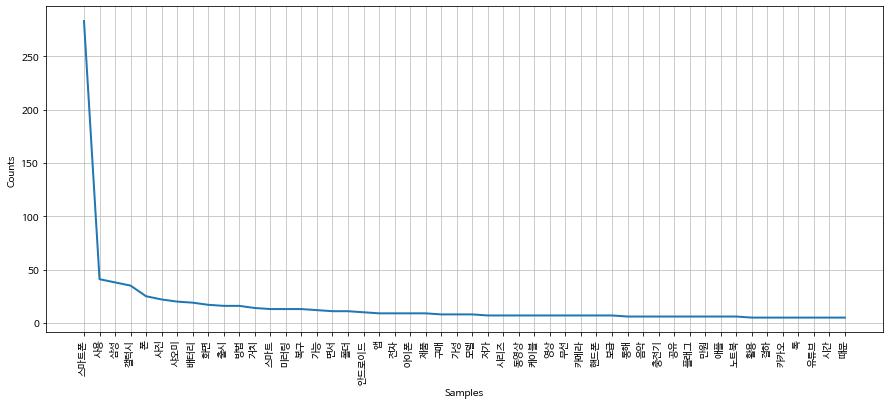

In [ ]:
blog = nltk.Text(new_tokens, name='스마트폰')
plt.figure(figsize=(15,6))
blog.plot(50)
plt.show()

In [ ]:
stoptext = '''
    수 것 연결 가격 공개 때 설정 경우 이 비 질문 위 등 생각 제 품 내용 법 분 추천 기능 요 교육
    용 시장 요즘 저 정도 처음 중 초 동해 오늘 이용 하루 밍 첫 업체 그 한번 이유 대한 블 알 기 형
    어요 가지 적 이나 까지 데 연 필요 지난 도 꼭
'''
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['스마트폰', '삼성', '갤럭시Z플립3', '언박싱', '후기', '진짜', '역대', '급', '스마트폰', '삼성']

### Word Cloud

In [ ]:
from wordcloud import WordCloud
from PIL import Image

In [ ]:
data = blog.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
mask = np.array(Image.open(maskfile))

In [ ]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [ ]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2, margin=10,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

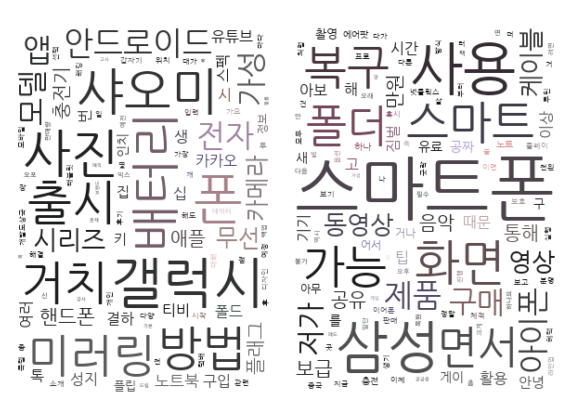

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

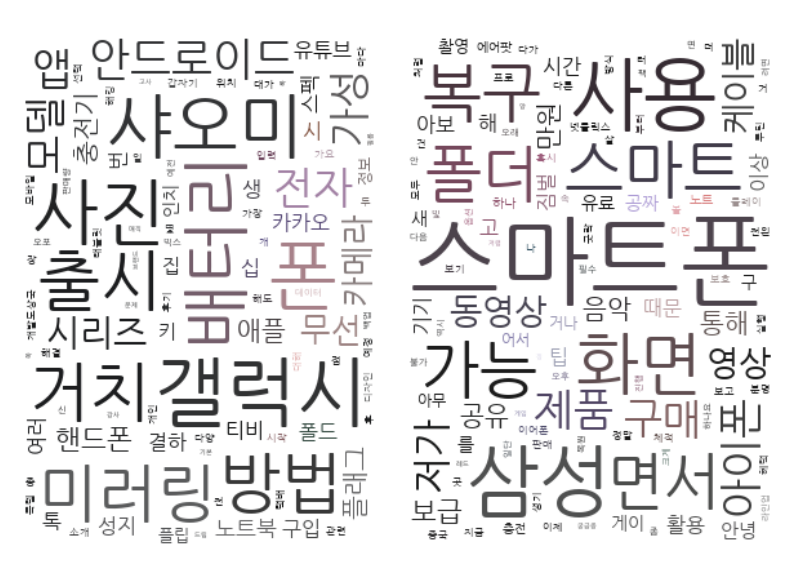

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')